<h1 style='text-align: center;'>Лабораторна робота №1<br>Робота з PyCaret</h1>
<h4 style="text-align: right;">Виконала<br>студентка групи КНТ-21-1<br>Ніколайчук А.І.</h4>

## Мета роботи: набуття навичок роботи з PyCaret.

## Хід роботи

### 1. Завантаження датасету та прийняття рішення щодо завдання

https://github.com/pycaret/pycaret/blob/master/datasets/automobile.csv

The "Automobile" dataset is a comprehensive collection of car specifications, designed for predictive modeling and analysis of vehicle prices. It includes various technical and categorical attributes that influence a car's value, such as make, body style, engine specifications, fuel efficiency, and performance metrics.

Features:
- Symboling (symboling) (Numerical) - A risk rating assigned by insurance companies to indicate how risky a car is (-2: safest, 3: most risky).
- Normalized Losses (normalized-losses) (Numerical) - Represents the relative average loss in insurance claims. Higher values indicate greater risk.
- Make (make) (Categorical) - The brand or manufacturer of the vehicle (e.g., Audi, Alfa-Romeo).
- Fuel Type (fuel-type) (Categorical) - The type of fuel the vehicle uses (gas, diesel).
- Aspiration (aspiration) (Categorical) - Indicates whether the engine uses natural aspiration or forced induction (std – Standard (naturally aspirated), turbo – Turbocharged).
- Number of Doors (num-of-doors) (Categorical) - The total number of doors in the vehicle (two or four).
- Body Style (body-style) (Categorical) - The overall design type of the vehicle (sedan, convertible, hatchback, wagon, hardtop).
- Drive Wheels (drive-wheels) (Categorical) - The type of drivetrain in the car (fwd – Front-wheel drive, rwd – Rear-wheel drive, 4wd – Four-wheel drive).
- Engine Location (engine-location) (Categorical) - Specifies where the engine is positioned (front, rear).
- Wheel Base (wheel-base) (Numerical) - The distance between the front and rear axles, measured in inches.
- Length (length) (Numerical) - The total length of the car in inches.
- Width (width) (Numerical) - The overall width of the car in inches.
- Height (height) (Numerical) - The total height of the car in inches.
- Curb Weight (curb-weight) (Numerical) - The weight of the car without passengers or cargo (in pounds).
- Engine Type (engine-type) (Categorical) - Specifies the design of the engine (dohc – Double Overhead Camshaft, ohc – Overhead Camshaft, ohcv – Overhead Camshaft with V configuration, l – Inline engine).
- Number of Cylinders (num-of-cylinders) (Categorical) - The total number of engine cylinders (e.g., four, six, five).
- Engine Size (engine-size) (Numerical) - The displacement of the engine in cubic centimeters (cc).
- Fuel System (fuel-system) (Categorical) - Describes the fuel injection method (mpfi – Multi-Point Fuel Injection, 2bbl – 2-Barrel Carburetor).
- Bore (bore) (Numerical) - The diameter of the engine cylinder (in inches).
- Stroke (stroke) (Numerical) - The length of the piston stroke inside the cylinder (in inches).
- Compression Ratio (compression-ratio) (Numerical) - The ratio of the cylinder’s maximum to minimum volume. Higher values indicate higher efficiency - but may require premium fuel.
- Horsepower (horsepower) (Numerical) - The power output of the engine.
- Peak RPM (peak-rpm) (Numerical) - The maximum engine revolutions per minute (RPM).
- City MPG (city-mpg) (Numerical) - The fuel efficiency in miles per gallon (MPG) for city driving.
- Highway MPG (highway-mpg) (Numerical) - The fuel efficiency in miles per gallon (MPG) for highway driving.
- Price (price) (Numerical - Target Variable for Regression) - The market price of the vehicle in dollars.



In [1]:
# Перевірка версії pycaret
!pip show pycaret

Name: pycaret
Version: 3.3.2
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: C:\Users\anuta\anaconda3\envs\pycaret_env\Lib\site-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, xxhash, yellowbrick
Required-by: 


In [2]:
# Первірка версії python
import sys
print(sys.version)

3.11.11 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:34:19) [MSC v.1929 64 bit (AMD64)]


In [3]:
from pycaret.datasets import get_data
data = get_data('automobile')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [5]:
# Колонки bore, stroke, horsepower, peak-rpm мають в таблиці числові значення,
# але розпізнаний тип - об'єкт (хоча значення повинні бути float)

# Перевірка, чи є значення "?"
# рядки зі знаками питання (згідно https://github.com/pycaret/pycaret/blob/master/datasets/automobile.csv)
data.loc[[53, 54, 55, 126, 127]]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
53,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,11845
54,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,13645
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,?,?,9.4,135,6000,16,23,15645
126,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295
127,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895


In [6]:
# Перед роботою потрібно встановити правильні значення в "проблемних" колонках
import pandas as pd
fix_col = ['bore', 'stroke', 'horsepower', 'peak-rpm']
# Перетворення колонок на числовий формат, при помилці встановити значення NaN
data[fix_col] = data[fix_col].apply(pd.to_numeric, errors='coerce')
# Перевірка, чи корекція пройшла успішно
data.loc[[53, 54, 55, 126, 127]]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
53,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845
54,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645
126,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295
127,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895


In [7]:
# Перевірка типів даних, кількості null значень - типи даних тепер правильні
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [8]:
# Перевірка колонок з null
data.columns[data.isnull().any()]

Index(['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower',
       'peak-rpm'],
      dtype='object')

##### Обране завдання - регресія, оскільки наявна ознака "ціна" та можна зробити прогноз ціни автомобілей у залежності від інших якостей. Цільова змінна "ціна" є числовою та неперервною. 

<Axes: >

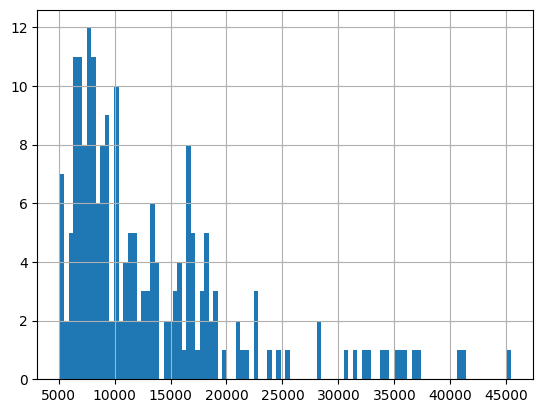

In [9]:
# Визначення як розподілена ціна - цільова ознака для завдання регресії
data.price.hist(bins=100)

array([[<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'engine-size'}>],
       [<Axes: title={'center': 'curb-weight'}>, <Axes: >]], dtype=object)

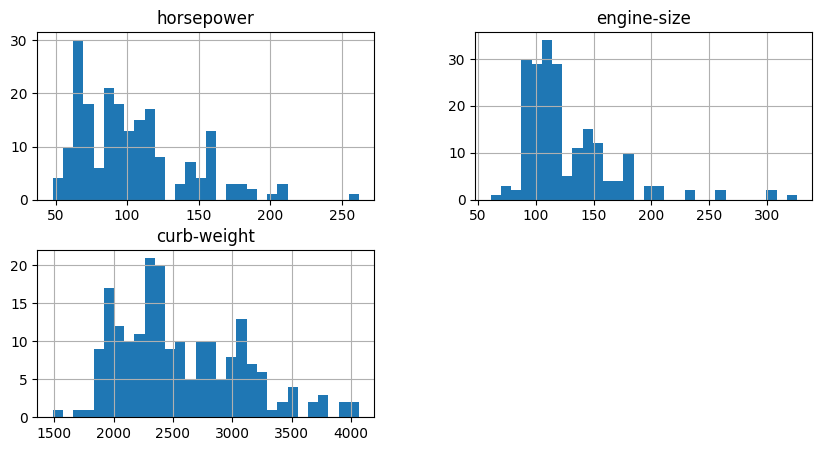

In [10]:
# Розгляд розподілу інших ознак
data[['horsepower', 'engine-size', 'curb-weight']].hist(figsize=(10, 5), bins=30)

### 2. Аналіз даних

#### Експеримент 1

In [11]:
# Налаштування середовища для регресії з нормалізацією даних та імпутацією пустих значень
from pycaret import regression
from pycaret.regression import *
exp1 = regression.setup(data, normalize = True, target = 'price',
                        imputation_type='simple', numeric_imputation='mean', categorical_imputation='mode',
                        session_id = 123)

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(202, 26)"
4,Transformed data shape,"(202, 70)"
5,Transformed train set shape,"(141, 70)"
6,Transformed test set shape,"(61, 70)"
7,Numeric features,15
8,Categorical features,10
9,Rows with missing values,20.8%


In [12]:
# Перевірка як дані були перетворені при налаштуванні - все правильно
X_train_exp1=regression.get_config('X_train_transformed')
X_train_exp1

,symboling,normalized-losses,make_toyota,make_saab,make_peugot,make_audi,make_volkswagen,make_nissan,make_honda,make_mazda,...,fuel-system_spdi,fuel-system_4bbl,fuel-system_spfi,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
172,-1.451134,-1.772079e+00,2.533980,-0.191741,-0.228558,-0.191741,-0.191741,-0.332018,-0.261116,-0.318689,...,-0.147442,-0.084515,-0.084515,-0.138539,0.899002,-0.393976,-0.322688,-1.836258e+00,0.271171,0.179924
132,1.809581,9.678767e-01,-0.394636,5.215362,-0.228558,-0.191741,-0.191741,-0.332018,-0.261116,-0.318689,...,-0.147442,-0.084515,-0.084515,0.747279,-0.576672,-0.319780,1.445457,8.790596e-01,-0.933086,-0.665718
112,-0.635955,1.322459e+00,-0.394636,-0.191741,4.375255,-0.191741,-0.191741,-0.332018,-0.261116,-0.318689,...,-0.147442,-0.084515,-0.084515,0.439168,-0.199904,-0.468172,-0.192678,-1.652933e-01,-0.933086,-0.947598
8,0.179224,1.225755e+00,-0.394636,-0.191741,-0.228558,5.215362,-0.191741,-0.332018,-0.261116,-0.318689,...,-0.147442,-0.084515,-0.084515,-0.831787,0.459440,-0.492904,0.925414,8.790596e-01,-1.234150,-1.511359
184,0.994402,-8.372703e-01,-0.394636,-0.191741,-0.228558,-0.191741,5.215362,-0.332018,-0.261116,-0.318689,...,-0.147442,-0.084515,-0.084515,-0.600704,0.459440,-0.072460,-0.114671,8.790596e-01,0.120639,0.179924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.994402,3.306843e-02,-0.394636,-0.191741,-0.228558,-0.191741,-0.191741,-0.332018,-0.261116,-0.318689,...,-0.147442,-0.084515,-0.084515,-1.679091,-0.702261,-0.196120,-1.466782,4.357731e-02,3.281814,3.139669
98,-0.635955,2.587118e-01,-0.394636,-0.191741,-0.228558,-0.191741,-0.191741,3.011881,-0.261116,-0.318689,...,-0.147442,-0.084515,-0.084515,0.323627,0.051275,-0.319780,1.237440,2.524479e-01,-1.234150,-1.229479
66,-0.635955,-8.695051e-01,-0.394636,-0.191741,-0.228558,-0.191741,-0.191741,-0.332018,-0.261116,-0.318689,...,-0.147442,-0.084515,-0.084515,0.901334,1.212976,2.771723,0.483378,-1.522952e+00,-0.481489,-0.806658
126,-0.635955,-4.580836e-16,-0.394636,-0.191741,-0.228558,-0.191741,-0.191741,-0.332018,-0.261116,-0.318689,...,-0.147442,-0.084515,-0.084515,0.439168,2.029306,-0.393976,0.000000,1.899667e-15,-0.330957,0.038983


In [13]:
# Перевірка розподілу ознак на numerical/categorical - все правильно
dtypes = regression.get_config('X_train').dtypes
print(dtypes)

symboling                int8
normalized-losses     float32
make                 category
fuel-type            category
aspiration           category
num-of-doors         category
body-style           category
drive-wheels         category
engine-location      category
wheel-base            float32
length                float32
width                 float32
height                float32
curb-weight             int32
engine-type          category
num-of-cylinders     category
engine-size             int32
fuel-system          category
bore                  float32
stroke                float32
compression-ratio     float32
horsepower            float32
peak-rpm              float32
city-mpg                 int8
highway-mpg              int8
dtype: object


In [14]:
# Перевірка, чи є пусті значення - немає
X_train_exp1.columns[X_train_exp1.isnull().any()]

Index([], dtype='object')

In [15]:
# Тренування всіх моделей зі значенням гіперпараметрів за замовчуванням
best_exp1 = regression.compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1556.4021,5039058.0129,2106.1295,0.9033,0.1382,0.1139,0.5940
gbr,Gradient Boosting Regressor,1593.3145,5241538.1225,2190.9793,0.9072,0.1452,0.1168,0.4100
et,Extra Trees Regressor,1622.1251,5924590.1922,2337.3081,0.8968,0.1636,0.1273,0.5390
par,Passive Aggressive Regressor,1709.3211,5925798.6457,2290.1821,0.9108,0.1714,0.1297,0.2470
llar,Lasso Least Angle Regression,1717.7230,5804610.9033,2323.2438,0.8924,0.1982,0.1358,0.2410
br,Bayesian Ridge,1726.4896,5279438.8762,2227.7781,0.9001,0.2662,0.1442,0.2560
en,Elastic Net,1768.5924,6370111.6437,2402.2471,0.8995,0.1965,0.1400,0.2480
ridge,Ridge Regression,1797.6286,5520843.3866,2299.1632,0.8908,0.2011,0.1571,0.2930
dt,Decision Tree Regressor,1827.5495,7263501.4667,2591.4758,0.8617,0.1636,0.1276,0.2920
huber,Huber Regressor,1857.0814,7057264.4925,2579.2025,0.8745,0.1936,0.1570,0.2730


In [16]:
# Інформація про найкращу модель після тренування
print(best_exp1)

RandomForestRegressor(n_jobs=-1, random_state=123)


In [17]:
# Візуалізація результатів навчання - оцінка якості найкращої моделі

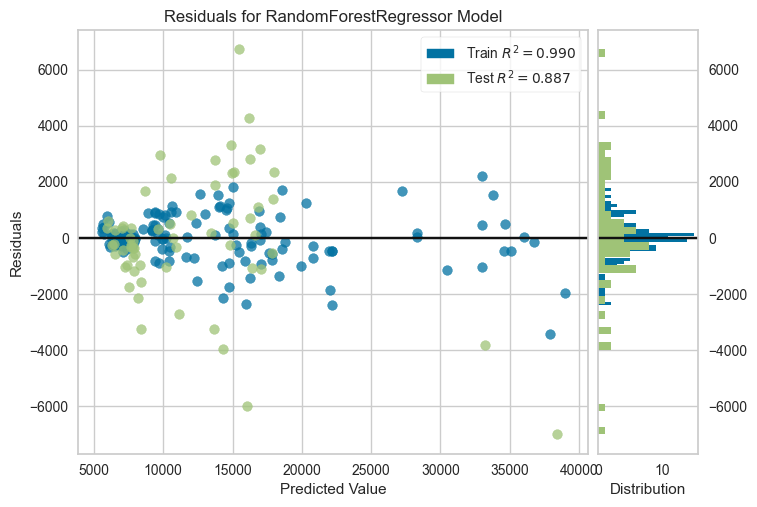

In [18]:
from pycaret.regression import plot_model
# Різниця між прогнозованими та реальними значеннями
plot_model(best_exp1, plot='residuals')

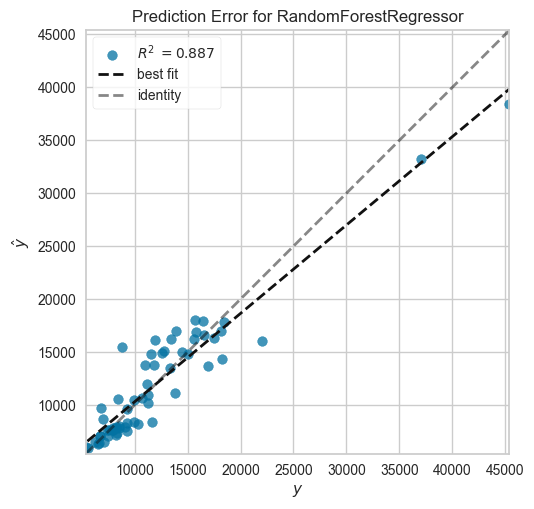

In [19]:
# Зміни помилок в залежності від передбачених значень
plot_model(best_exp1, plot='error')

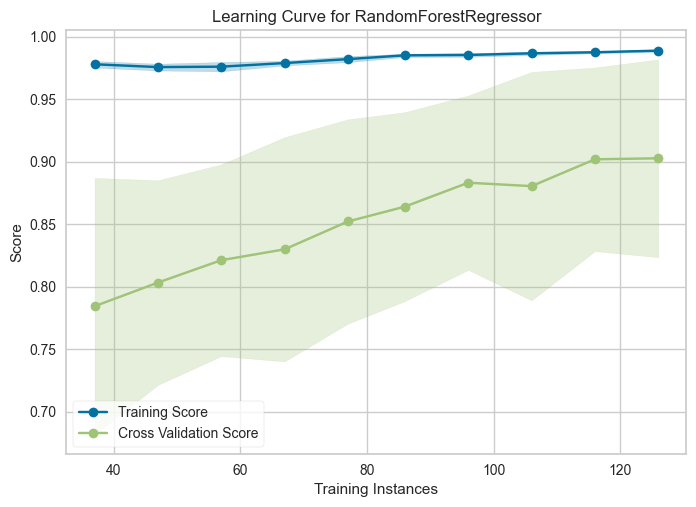

In [20]:
# Зміна точності в процесі навчанням моделі
plot_model(best_exp1, plot='learning')

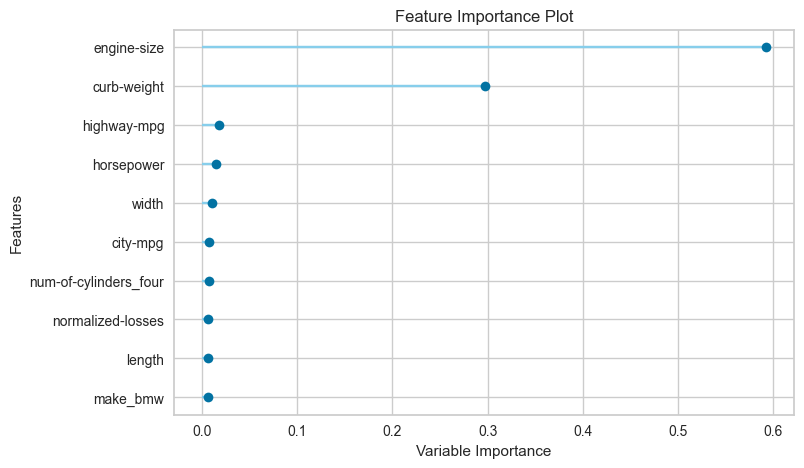

In [21]:
# Важливість ознак - які найбільше впливають на прогнози моделі
plot_model(best_exp1, plot='feature')

In [22]:
# Параметри моделі, які впливають на продуктивність
plot_model(best_exp1, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,squared_error
max_depth,None
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2


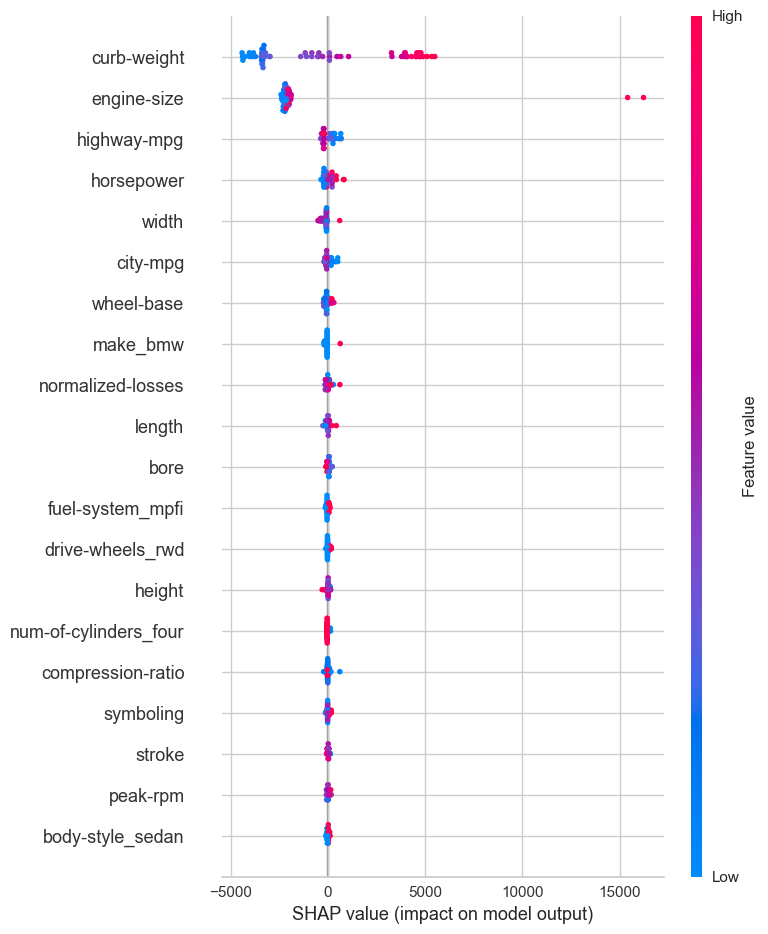

In [23]:
# Аналіз впливу окремих ознак на прогнози моделі
# pip install pycaret[analysis]
regression.interpret_model(best_exp1)

##### Далі проведемо різні покращення, щоб встановити найкращу модель та візуалізуємо інформацію про неї

In [24]:
# Налаштування гіперпараметрів
tuned_model_exp1=tune_model(best_exp1, optimize = 'rmse')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2047.7564,7538865.5836,2745.6995,0.8562,0.1598,0.1159
1,826.9806,1163981.3403,1078.8797,0.9787,0.0888,0.0725
2,1282.4248,3719194.9394,1928.5214,0.9634,0.1220,0.0827
3,1263.9903,2655472.9376,1629.5622,0.8351,0.1269,0.1075
4,1540.0137,4080048.5051,2019.9130,0.9229,0.1499,0.1283
5,1204.4825,2065175.0805,1437.0717,0.9587,0.1374,0.1156
6,2617.9913,16039338.7492,4004.9143,0.9005,0.1441,0.1214
7,1537.2495,4874071.8066,2207.7300,0.9132,0.1253,0.1030
8,1033.9009,1983017.9605,1408.1967,0.9593,0.1207,0.0924


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [25]:
# Інформація про оптимізовану модель
print(tuned_model_exp1)

RandomForestRegressor(bootstrap=False, max_depth=8, max_features='sqrt',
                      min_impurity_decrease=0.0001, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=240, n_jobs=-1,
                      random_state=123)


<p style="color:green; font-weight:bold;">Результат покращився</p>

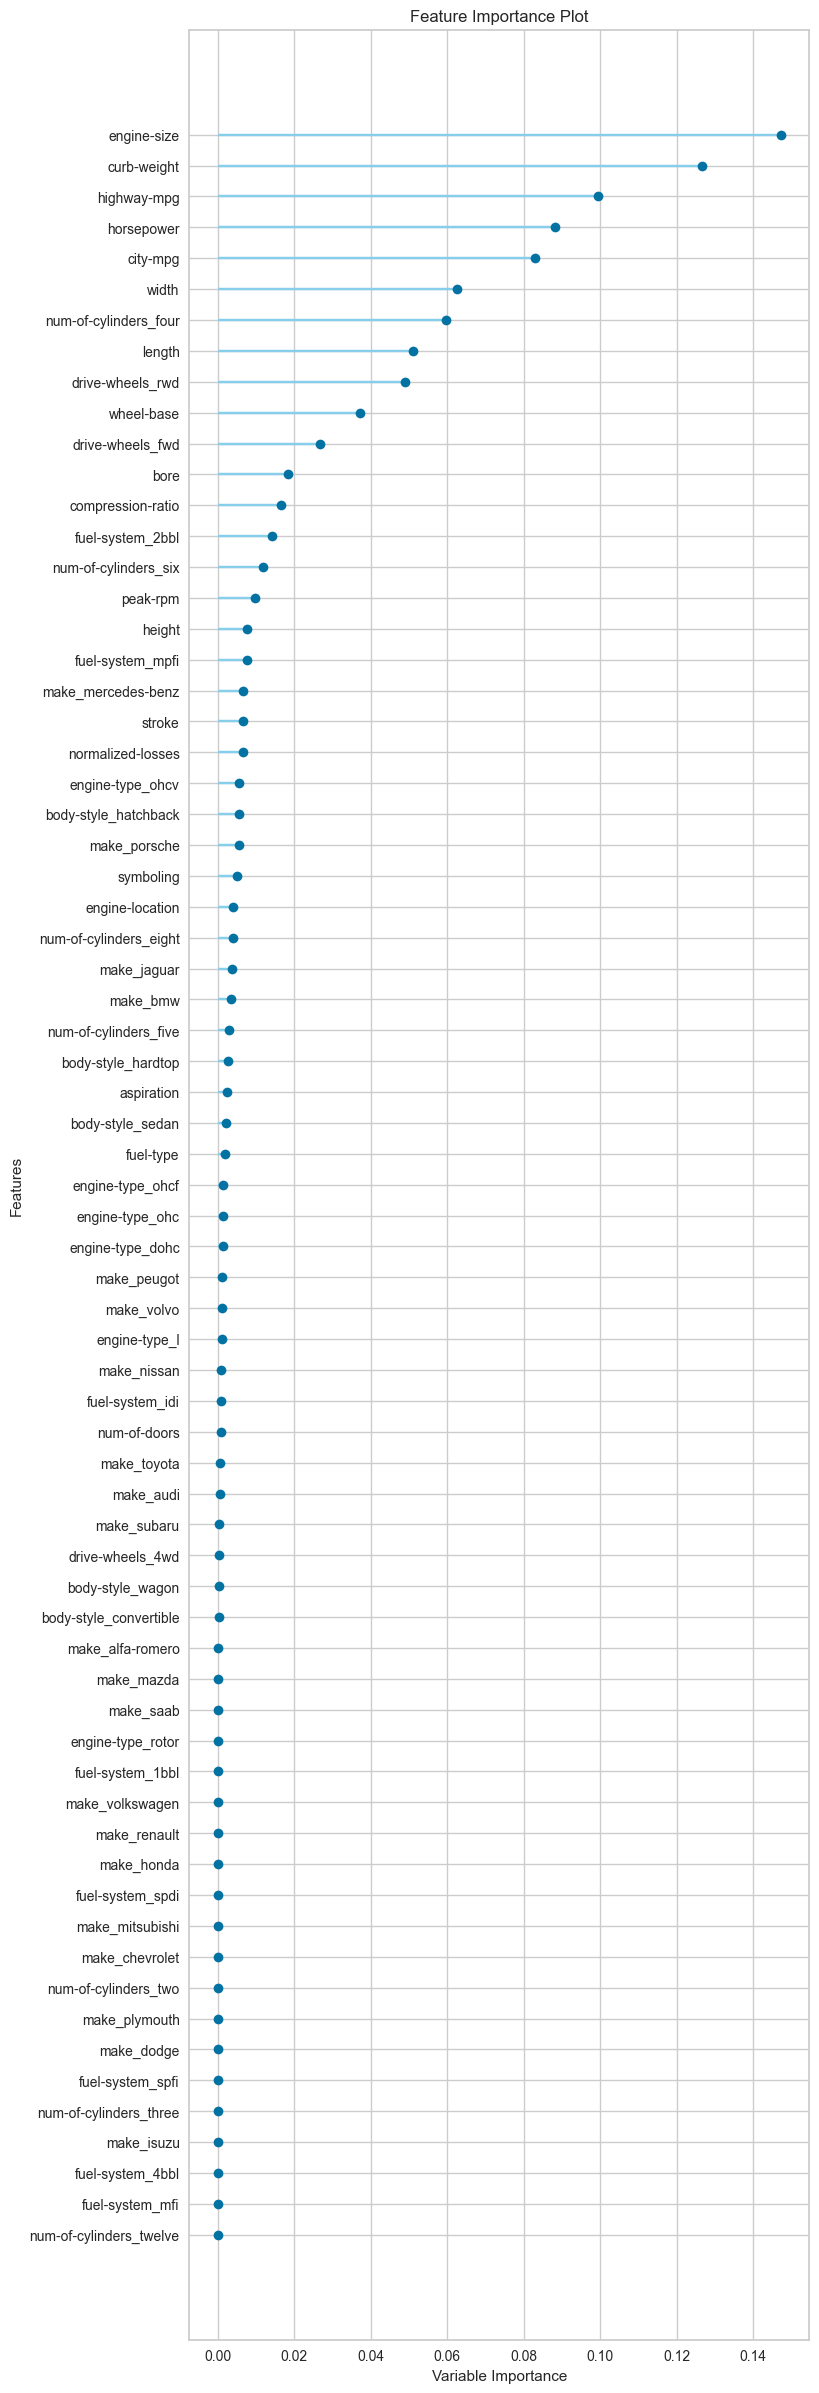

In [26]:
# Важливість інших ознак зросла
plot_model(tuned_model_exp1, plot='feature_all')

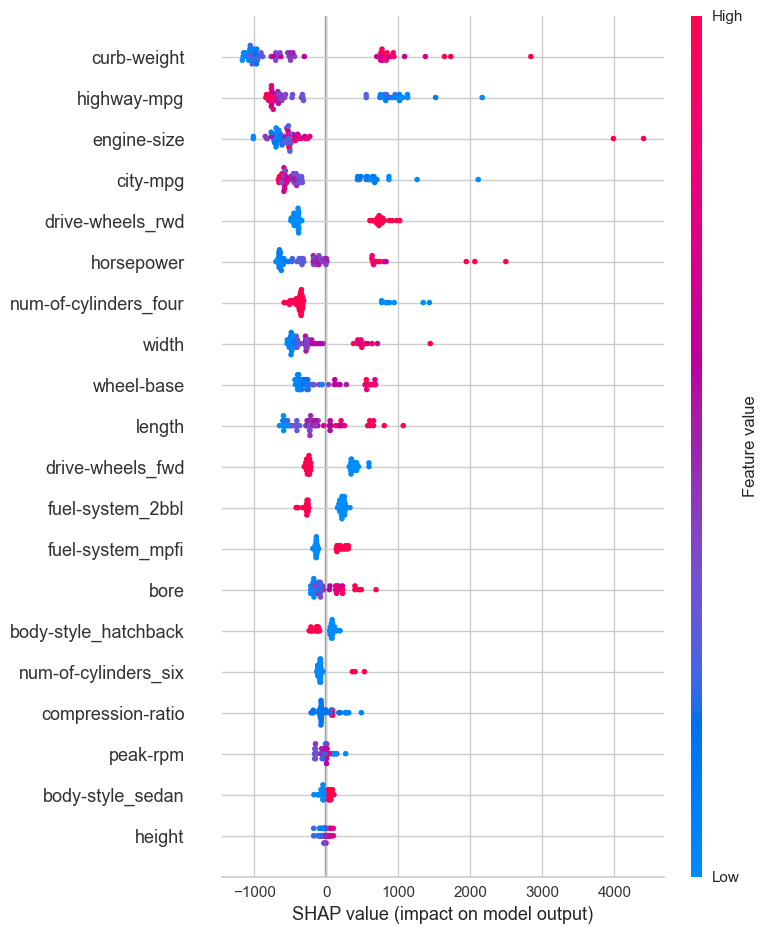

In [27]:
regression.interpret_model(tuned_model_exp1)

In [28]:
# Об'єднання найкращої моделі в ансамбль
bagged_best_exp1 = regression.ensemble_model(best_exp1, optimize = 'rmse')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2228.3276,9453577.3131,3074.6670,0.8197,0.1725,0.1244
1,957.6467,2386713.8838,1544.8993,0.9564,0.1093,0.0825
2,1207.1744,2080344.3919,1442.3399,0.9795,0.1067,0.0896
3,1399.7346,3697805.2964,1922.9678,0.7704,0.1553,0.1195
4,1804.2956,5563883.6741,2358.7886,0.8948,0.1593,0.1352
5,1671.8603,4505116.0780,2122.5259,0.9100,0.1623,0.1407
6,2148.7332,12647141.2405,3556.2819,0.9215,0.1272,0.0981
7,1699.4067,6556156.9151,2560.4993,0.8832,0.1306,0.1062
8,1071.7258,1661830.3505,1289.1200,0.9659,0.1038,0.0891


<p style="color:red; font-weight:bold;">Результат погіршився</p>

In [29]:
print(bagged_best_exp1)

BaggingRegressor(estimator=RandomForestRegressor(n_jobs=-1, random_state=123),
                 random_state=123)


In [30]:
# Ансамбль через інший метод
boosting_best_exp1 = regression.ensemble_model(best_exp1, optimize = 'rmse', method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2405.6617,10785485.8364,3284.1263,0.7943,0.1838,0.1306
1,1175.4754,1972918.4952,1404.6062,0.9640,0.1015,0.0951
2,1184.3143,2467363.4730,1570.7843,0.9757,0.1231,0.0937
3,1102.0008,2379741.4770,1542.6411,0.8523,0.1179,0.0913
4,1298.1675,2944109.5546,1715.8408,0.9444,0.1327,0.1068
5,2065.2643,10060151.2440,3171.7741,0.7989,0.1796,0.1563
6,2059.8289,9985501.5259,3159.9844,0.9381,0.1231,0.1051
7,1181.0643,2558783.7029,1599.6199,0.9544,0.1089,0.0862
8,1158.1154,2059212.9501,1434.9958,0.9577,0.1123,0.0951


<p style="color:red; font-weight:bold;">Результат покращився у порівнянні з іншим методом ансамблю, але погіршився у порівнянні з попередньою оптимізацією</p>

In [31]:
# Об'єднання оптимізованої моделі в ансамбль
bagged_tuned_exp1 = regression.ensemble_model(tuned_model_exp1, optimize = 'rmse')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1865.7391,6372683.9693,2524.4176,0.8784,0.1488,0.1078
1,973.2659,1737002.7888,1317.9540,0.9683,0.1036,0.0871
2,1465.1921,4427058.4950,2104.0576,0.9564,0.1263,0.0932
3,1367.0638,2796977.4744,1672.4167,0.8264,0.1409,0.1256
4,1633.0628,4969314.9445,2229.1960,0.9061,0.1586,0.1344
5,1185.8560,2085940.9329,1444.2787,0.9583,0.1368,0.1132
6,2770.6393,18866639.5554,4343.5745,0.8830,0.1566,0.1286
7,1920.2758,9421738.1992,3069.4850,0.8321,0.1490,0.1172
8,1502.6240,3185732.3876,1784.8620,0.9346,0.1339,0.1186


In [32]:
print(bagged_tuned_exp1)

BaggingRegressor(estimator=RandomForestRegressor(bootstrap=False, max_depth=8,
                                                 max_features='sqrt',
                                                 min_impurity_decrease=0.0001,
                                                 min_samples_leaf=2,
                                                 min_samples_split=5,
                                                 n_estimators=240, n_jobs=-1,
                                                 random_state=123),
                 random_state=123)


<p style="color:red; font-weight:bold;">Результат погіршився</p>

In [33]:
# Ансамбль через комбінацію декількох моделей 

# Обрано моделі, які показали себе найкраще та мають різні механізмах навчання
rf1 = regression.create_model('rf', verbose=False)
gbr1 = regression.create_model('gbr', verbose=False)
et1 = regression.create_model('et', verbose=False)
par1 = regression.create_model('par', verbose=False)
br1 = regression.create_model('br', verbose=False)

blender_exp1 = regression.blend_models([rf1,gbr1,et1,par1,br1])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2135.9014,7102701.6695,2665.0894,0.8645,0.1635,0.1275
1,1169.9837,2213398.8394,1487.7496,0.9596,0.1434,0.1049
2,1004.3582,2269725.8969,1506.5610,0.9777,0.1037,0.0684
3,1045.8580,1804231.4222,1343.2168,0.8880,0.1072,0.0929
4,1237.1213,2691471.6462,1640.5705,0.9491,0.1275,0.1051
5,1511.9151,3979504.6614,1994.8696,0.9205,0.1480,0.1276
6,2179.1110,12411418.9476,3522.9844,0.9230,0.1266,0.1032
7,1162.3791,2458879.0630,1568.0813,0.9562,0.1268,0.0958
8,1100.9655,2087882.4153,1444.9507,0.9571,0.1181,0.0919


In [34]:
print(blender_exp1)

VotingRegressor(estimators=[('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=123)),
                            ('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=123)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123)),
                            ('Passive Aggressive Regressor',
                             PassiveAggressiveRegressor(random_state=123)),
                            ('Bayesian Ridge', BayesianRidge())],
                n_jobs=-1)


In [35]:
# Before the best:
#            MAE	    MSE           RMSE	      R2	 RMSLE	 MAPE
# Mean	1531.8172	4893504.1452	2065.4999	0.9220	0.1367	0.1121

# After blender the best:
# Mean	1429.1530	4082971.5892	1912.6124	0.9342	0.1328	0.1074

<p style="color:green; font-weight:bold;">Результат покращився</p>

In [36]:
# Застосування метамоделі для комбінації моделей
stacker_exp1 = regression.stack_models([rf1,gbr1,et1,par1,br1])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2173.6579,7602863.3115,2757.3290,0.8550,0.1688,0.1299
1,1296.7941,2542869.5365,1594.6377,0.9536,0.1828,0.1230
2,978.5254,1863463.3859,1365.0873,0.9817,0.1012,0.0716
3,1220.0279,2421493.7784,1556.1150,0.8497,0.1226,0.1096
4,1181.2287,2645130.7839,1626.3858,0.9500,0.1281,0.1022
5,1789.0847,6023038.6024,2454.1880,0.8796,0.1635,0.1465
6,1773.6664,9115189.2178,3019.1372,0.9435,0.1107,0.0876
7,1186.5610,2693181.8824,1641.0917,0.9520,0.1384,0.1007
8,1168.5133,2440000.6314,1562.0501,0.9499,0.1190,0.0937


In [37]:
print(stacker_exp1)

StackingRegressor(cv=5,
                  estimators=[('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123)),
                              ('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123)),
                              ('Passive Aggressive Regressor',
                               PassiveAggressiveRegressor(random_state=123)),
                              ('Bayesian Ridge', BayesianRidge())],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)


<p style="color:red; font-weight:bold;">Результат погіршився в порівнянні з blend_models</p>

##### Визначено найкращу модель blender_exp1, створену на основі методу blend_models(). Проведемо візуалізацію результатів

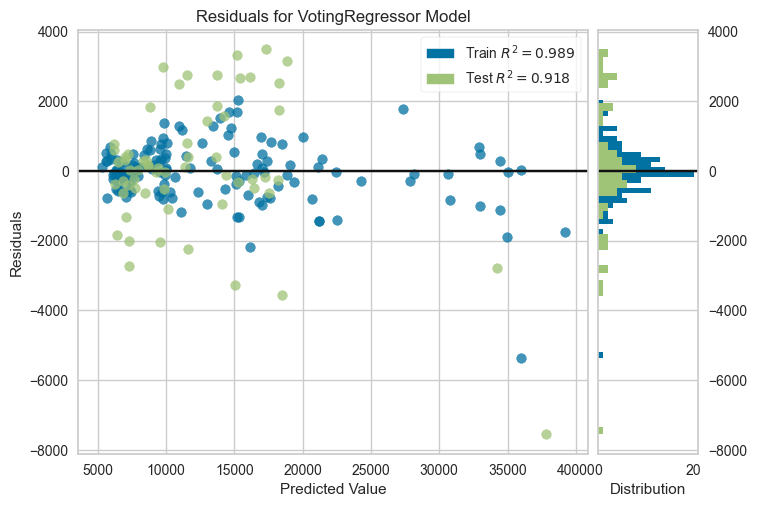

In [38]:
# Різниця між прогнозованими та реальними значеннями
# Test R2 збільшилося на 31 одиниць, розрив між метрикою для тренувальної та тестової порції зменшився
# Більша концентрація помилки прогнозів біля 0
plot_model(blender_exp1, plot='residuals')

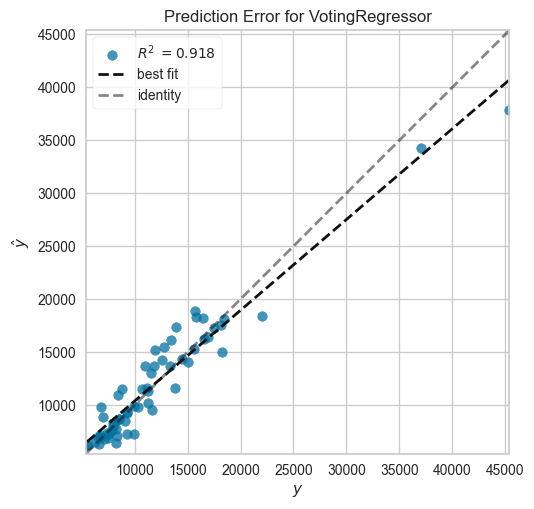

In [39]:
# Зміни помилок в залежності від передбачених значень
plot_model(blender_exp1, plot='error')

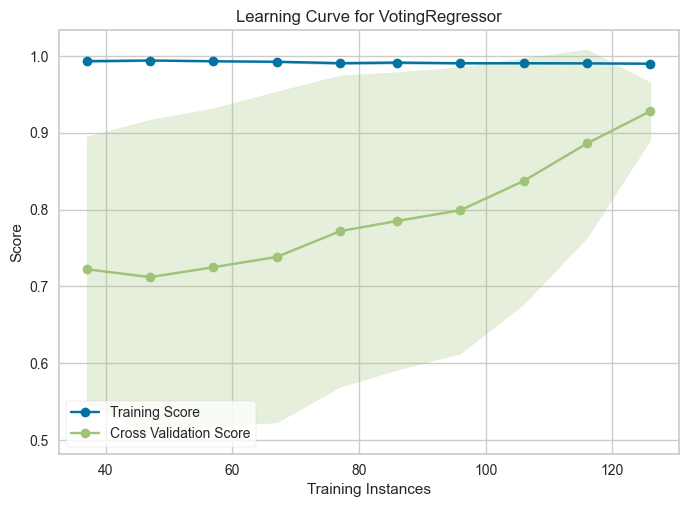

In [40]:
# Зміна точності в процесі навчанням моделі
# Валідаційна оцінка ближча до тестової
# Оскільки тестова оцінка продовжує рости - додавання даних допоможе в подальшому покращенні моделі
plot_model(blender_exp1, plot='learning')

##### Проведемо прогнозування

In [41]:
# predict on holdout / test set
pred_holdout = regression.predict_model(blender_exp1);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,1313.2517,3608828.0228,1899.6916,0.9182,0.1404,0.1091


In [42]:
pred_holdout.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,prediction_label
50,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.099998,...,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6695,7181.962629
166,2,134.0,toyota,gas,std,two,hardtop,rwd,front,98.400002,...,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,11199,11612.732996
37,0,106.0,honda,gas,std,two,hatchback,fwd,front,96.500000,...,1bbl,3.15,3.58,9.0,86.0,5800.0,27,33,9095,8454.301203
151,0,91.0,toyota,gas,std,four,wagon,4wd,front,95.699997,...,2bbl,3.05,3.03,9.0,62.0,4800.0,27,32,8778,11520.862124
19,0,81.0,chevrolet,gas,std,four,sedan,fwd,front,94.500000,...,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,6575,6969.275505


In [43]:
# predict on new data
data2 = data.copy()
data2.drop('price', axis=1, inplace=True)
data2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


In [44]:
# finalize model
best_final = regression.finalize_model(blender_exp1)

In [45]:
# predict on data2
predictions = regression.predict_model(best_final, data=data2)
predictions.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,prediction_label
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.599998,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,15211.131810
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.599998,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,15211.131810
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.500000,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16202.412144
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.800003,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13158.843845
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.400002,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17113.484888


##### Збереження/завантаження моделі

In [46]:
regression.save_model(best_final, 'automobile-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['symboling', 'normalized-losses',
                                              'wheel-base', 'length', 'width',
                                              'height', 'curb-weight',
                                              'engine-size', 'bore', 'stroke',
                                              'compression-ratio', 'horsepower',
                                              'peak-rpm', 'city-mpg',
                                              'highway-mpg'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper...
                  VotingRegressor(estimators=[('Random Forest Regressor',
                                               RandomForestRegressor(n_jobs=-1,
                                                                     random_state=123)),
       

In [47]:
loaded_pipeline = regression.load_model('automobile-pipeline')

Transformation Pipeline and Model Successfully Loaded


In [48]:
print(loaded_pipeline)

Pipeline(memory=FastMemory(location=C:\Users\anuta\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['symboling', 'normalized-losses',
                                             'wheel-base', 'length', 'width',
                                             'height', 'curb-weight',
                                             'engine-size', 'bore', 'stroke',
                                             'compression-ratio', 'horsepower',
                                             'peak-rpm', 'city-mpg',
                                             'highway-mpg'],
                                    transformer=SimpleImputer())),
                (...
                 VotingRegressor(estimators=[('Random Forest Regressor',
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=123)),
                                        

#### Експеримент 2 на основі зменшення кількості ознак (для оптимізації використання ресурсів для навчання)

In [49]:
experiment2 = regression.setup(data, normalize = True, target = 'price',
                               imputation_type='simple', numeric_imputation='mean', categorical_imputation='mode',
                               # Доданий параметр для видалення ознак, що мають високу кореляцію між собою
                               remove_multicollinearity = True,
                     session_id = 123)

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(202, 26)"
4,Transformed data shape,"(202, 62)"
5,Transformed train set shape,"(141, 62)"
6,Transformed test set shape,"(61, 62)"
7,Numeric features,15
8,Categorical features,10
9,Rows with missing values,20.8%


In [50]:
X_train_exp2=regression.get_config('X_train_transformed')
X_train_exp2

,symboling,normalized-losses,make_toyota,make_saab,make_peugot,make_audi,make_volkswagen,make_nissan,make_honda,make_mazda,...,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_spdi,fuel-system_4bbl,bore,stroke,horsepower,peak-rpm,city-mpg
172,-1.451134,-1.772079e+00,2.533980,-0.191741,-0.228558,-0.191741,-0.191741,-0.332018,-0.261116,-0.318689,...,-0.707107,-0.345033,-0.084515,-0.147442,-0.084515,-0.138539,0.899002,-0.322688,-1.836258e+00,0.271171
132,1.809581,9.678767e-01,-0.394636,5.215362,-0.228558,-0.191741,-0.191741,-0.332018,-0.261116,-0.318689,...,-0.707107,-0.345033,-0.084515,-0.147442,-0.084515,0.747279,-0.576672,1.445457,8.790596e-01,-0.933086
112,-0.635955,1.322459e+00,-0.394636,-0.191741,4.375255,-0.191741,-0.191741,-0.332018,-0.261116,-0.318689,...,-0.707107,-0.345033,-0.084515,-0.147442,-0.084515,0.439168,-0.199904,-0.192678,-1.652933e-01,-0.933086
8,0.179224,1.225755e+00,-0.394636,-0.191741,-0.228558,5.215362,-0.191741,-0.332018,-0.261116,-0.318689,...,-0.707107,-0.345033,-0.084515,-0.147442,-0.084515,-0.831787,0.459440,0.925414,8.790596e-01,-1.234150
184,0.994402,-8.372703e-01,-0.394636,-0.191741,-0.228558,-0.191741,5.215362,-0.332018,-0.261116,-0.318689,...,-0.707107,-0.345033,-0.084515,-0.147442,-0.084515,-0.600704,0.459440,-0.114671,8.790596e-01,0.120639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.994402,3.306843e-02,-0.394636,-0.191741,-0.228558,-0.191741,-0.191741,-0.332018,-0.261116,-0.318689,...,1.414214,-0.345033,-0.084515,-0.147442,-0.084515,-1.679091,-0.702261,-1.466782,4.357731e-02,3.281814
98,-0.635955,2.587118e-01,-0.394636,-0.191741,-0.228558,-0.191741,-0.191741,3.011881,-0.261116,-0.318689,...,-0.707107,-0.345033,-0.084515,-0.147442,-0.084515,0.323627,0.051275,1.237440,2.524479e-01,-1.234150
66,-0.635955,-8.695051e-01,-0.394636,-0.191741,-0.228558,-0.191741,-0.191741,-0.332018,-0.261116,-0.318689,...,-0.707107,2.898275,-0.084515,-0.147442,-0.084515,0.901334,1.212976,0.483378,-1.522952e+00,-0.481489
126,-0.635955,-4.580836e-16,-0.394636,-0.191741,-0.228558,-0.191741,-0.191741,-0.332018,-0.261116,-0.318689,...,-0.707107,-0.345033,-0.084515,-0.147442,-0.084515,0.439168,2.029306,0.000000,1.899667e-15,-0.330957


In [51]:
best_exp2 = regression.compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1535.0456,4827517.4098,2067.5910,0.9084,0.1373,0.1130,0.6990
gbr,Gradient Boosting Regressor,1634.6499,5370221.5434,2229.8234,0.9035,0.1480,0.1197,0.4650
et,Extra Trees Regressor,1642.8000,5882560.9778,2336.7133,0.8978,0.1633,0.1281,0.8080
par,Passive Aggressive Regressor,1732.2328,6009773.4054,2323.3661,0.9077,0.1739,0.1335,0.3060
br,Bayesian Ridge,1752.4523,5425550.4968,2268.2899,0.8965,0.2385,0.1469,0.3310
en,Elastic Net,1765.3858,6435166.0524,2420.7219,0.8976,0.1777,0.1378,0.5350
ridge,Ridge Regression,1836.6565,5952043.3302,2393.4876,0.8800,0.2219,0.1601,0.3480
llar,Lasso Least Angle Regression,1853.3439,8247011.8984,2721.2035,0.8376,0.2277,0.1723,0.3430
ada,AdaBoost Regressor,1876.7240,6083835.3194,2348.4391,0.8832,0.1729,0.1557,0.4480
huber,Huber Regressor,1881.7917,7370501.4998,2650.7690,0.8663,0.2022,0.1593,0.4800


In [52]:
print(best_exp2)

RandomForestRegressor(n_jobs=-1, random_state=123)


<p style="color:green; font-weight:bold;">Результат покращився від навчання на дефолтних параметрах при повній кількості ознак</p>

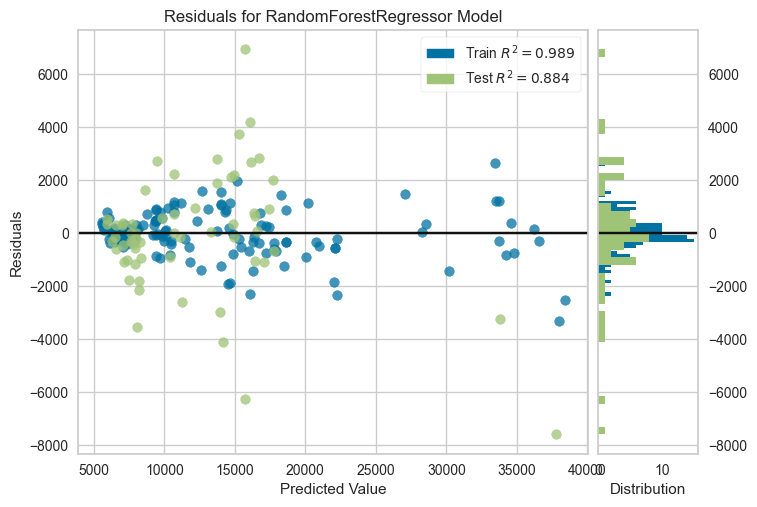

In [53]:
# Різниця між прогнозованими та реальними значеннями
plot_model(best_exp2, plot='residuals')

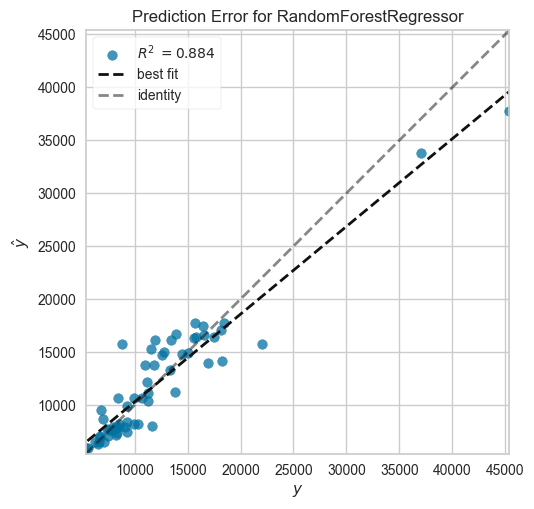

In [54]:
# Зміни помилок в залежності від передбачених значень
plot_model(best_exp2, plot='error')

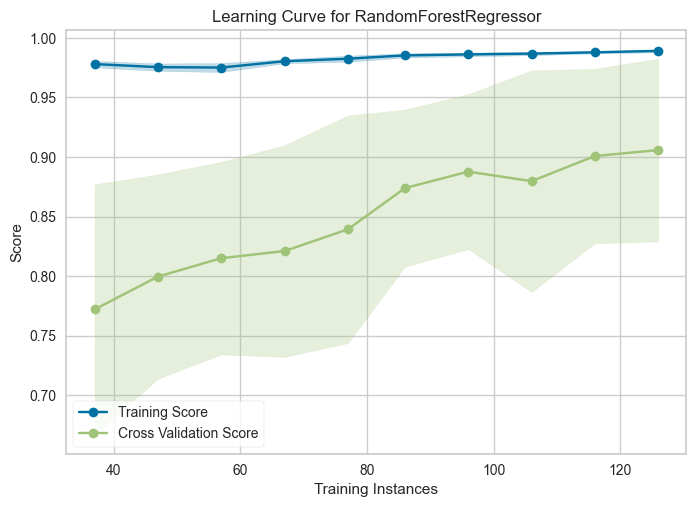

In [55]:
# Зміна точності в процесі навчанням моделі
plot_model(best_exp1, plot='learning')

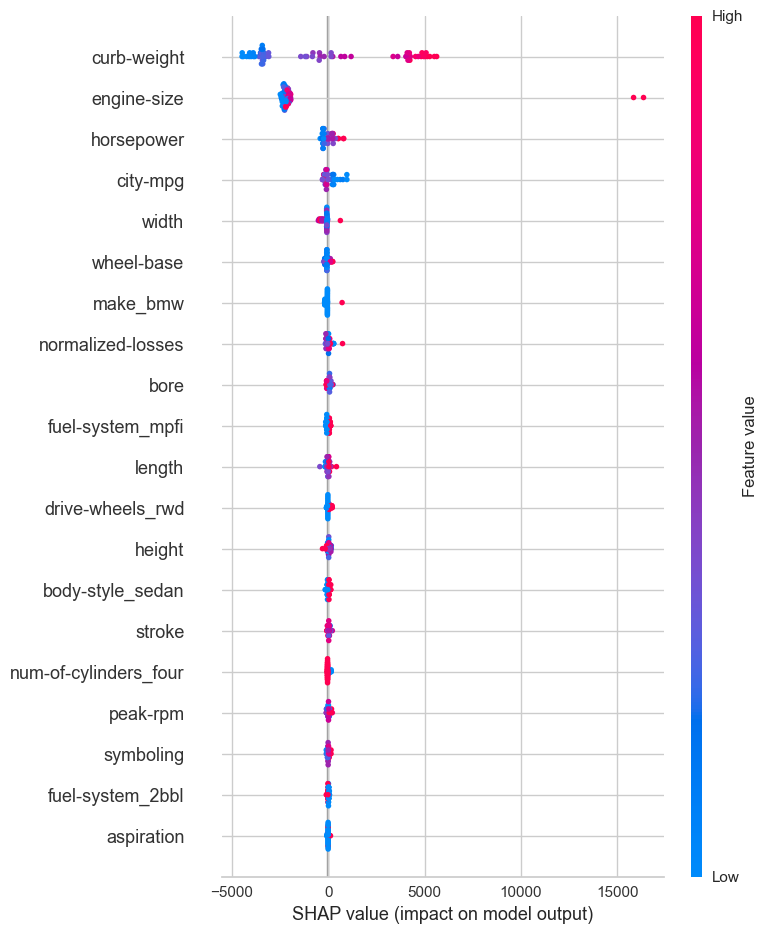

In [56]:
# Аналіз впливу окремих ознак на прогнози моделі
regression.interpret_model(best_exp2)

In [57]:
tuned_model_exp2=tune_model(best_exp2, optimize = 'rmse')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2033.2398,7369785.2620,2714.7348,0.8594,0.1544,0.1148
1,889.1595,1178980.2909,1085.8086,0.9785,0.0921,0.0787
2,1434.1937,4105820.3309,2026.2824,0.9596,0.1422,0.0955
3,1228.0145,2490910.3593,1578.2618,0.8454,0.1232,0.1063
4,1395.8092,3480141.0334,1865.5136,0.9342,0.1452,0.1195
5,1220.5092,2319185.3022,1522.8872,0.9536,0.1398,0.1153
6,2654.3542,16592832.1717,4073.4300,0.8971,0.1452,0.1216
7,1432.2450,4248241.2896,2061.1262,0.9243,0.1206,0.0969
8,1198.9643,2665388.9122,1632.6019,0.9453,0.1351,0.1051


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


<p style="color:red; font-weight:bold;">Результат погіршився</p>

In [58]:
bagged_best_exp2 = regression.ensemble_model(best_exp2, optimize = 'rmse')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2191.3058,9209413.2972,3034.7015,0.8243,0.1687,0.1218
1,918.0146,2183235.5851,1477.5776,0.9601,0.1060,0.0798
2,1197.0264,2104779.0777,1450.7857,0.9793,0.1126,0.0889
3,1453.2519,4024655.8479,2006.1545,0.7501,0.1605,0.1227
4,1764.5447,5172584.9239,2274.3318,0.9022,0.1555,0.1340
5,1660.0918,4435271.0835,2106.0083,0.9113,0.1624,0.1397
6,2158.4001,12110871.4101,3480.0677,0.9249,0.1269,0.1014
7,1682.8265,6517080.8261,2552.8574,0.8839,0.1309,0.1051
8,1070.8396,1759427.9619,1326.4343,0.9639,0.1119,0.0928


In [59]:
print(bagged_best_exp2)

BaggingRegressor(estimator=RandomForestRegressor(n_jobs=-1, random_state=123),
                 random_state=123)


<p style="color:red; font-weight:bold;">Результат погіршився</p>

In [60]:
rf2 = regression.create_model('rf', verbose=False)
gbr2 = regression.create_model('gbr', verbose=False)
et2 = regression.create_model('et', verbose=False)
par2 = regression.create_model('par', verbose=False)
br2 = regression.create_model('br', verbose=False)

blender_exp2 = regression.blend_models([rf2,gbr2,et2,par2,br2])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2174.8890,7333485.0898,2708.0408,0.8601,0.1677,0.1310
1,1155.7980,2150533.9079,1466.4699,0.9607,0.1450,0.1027
2,1032.8337,2261884.2795,1503.9562,0.9777,0.1095,0.0710
3,1032.1313,1726196.8057,1313.8481,0.8928,0.1077,0.0932
4,1210.3450,2661604.3458,1631.4424,0.9497,0.1241,0.1029
5,1522.9722,4066856.4907,2016.6449,0.9187,0.1526,0.1294
6,2136.8374,11598402.1616,3405.6427,0.9280,0.1257,0.1034
7,1198.5654,2514948.8034,1585.8590,0.9552,0.1279,0.0991
8,1158.1311,2459124.5827,1568.1596,0.9495,0.1265,0.0973


In [61]:
print(blender_exp2)

VotingRegressor(estimators=[('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=123)),
                            ('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=123)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123)),
                            ('Passive Aggressive Regressor',
                             PassiveAggressiveRegressor(random_state=123)),
                            ('Bayesian Ridge', BayesianRidge())],
                n_jobs=-1)


<p style="color:red; font-weight:bold;">Результат покращився від інших оптимізації для цього експерименту, але не покращився у порівнянні з результатами експерименту 1</p>

In [62]:
stacker_exp2 = regression.stack_models([rf2,gbr2,et2,par2,br2])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2200.6804,7930667.0803,2816.1440,0.8487,0.1709,0.1296
1,1180.1029,2095427.7417,1447.5592,0.9617,0.1787,0.1159
2,1005.4237,1940532.3583,1393.0299,0.9809,0.1016,0.0702
3,1213.0979,2390528.4366,1546.1334,0.8516,0.1223,0.1094
4,1148.4394,2480178.2007,1574.8582,0.9531,0.1247,0.1002
5,1779.4610,5982318.4248,2445.8778,0.8804,0.1666,0.1472
6,1723.3792,8407232.9760,2899.5229,0.9478,0.1093,0.0870
7,1245.9722,2732815.2248,1653.1229,0.9513,0.1357,0.1032
8,1340.9732,2951828.3957,1718.0886,0.9394,0.1257,0.1048


In [63]:
print(stacker_exp2)

StackingRegressor(cv=5,
                  estimators=[('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123)),
                              ('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123)),
                              ('Passive Aggressive Regressor',
                               PassiveAggressiveRegressor(random_state=123)),
                              ('Bayesian Ridge', BayesianRidge())],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)


<p style="color:red; font-weight:bold;">Результат погіршився</p>

Отже, результати цього експерименту зі зменшенням ознак не привели до покращення результату в порівнянні з найкращою моделлю, визначеною при попередньому експерименті. Але, якщо пріорітетним є оптимізація витрат на навчання моделі, можна обрати результат blender_exp2, оскільки значення метрик не набагато гірші.

In [64]:
# The best in experiment 1:
#            MAE	    MSE           RMSE	      R2	 RMSLE	 MAPE
# Mean	1429.1530	4082971.5892	1912.6124	0.9342	0.1328	0.1074

# The best in experiment 2:
# Mean	1441.0934	4074850.9967	1919.3923	0.9336	0.1356	0.1093

##### Проведемо візуалізацію результатів blender_exp2

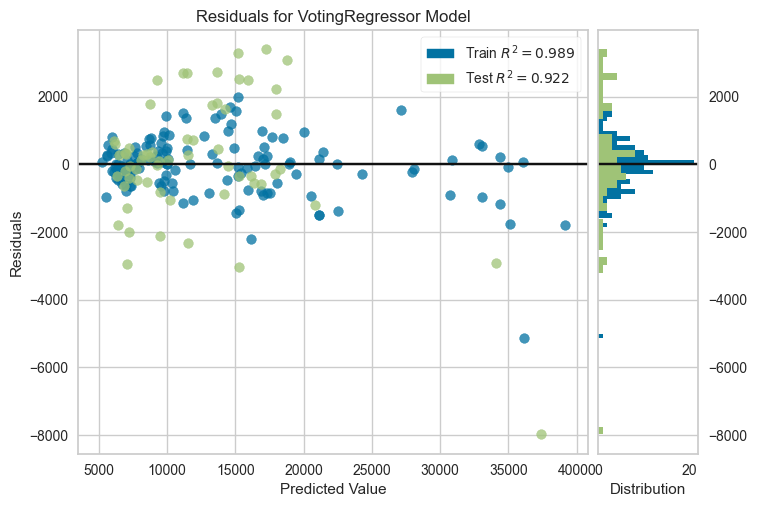

In [65]:
# Схожа ситуація як для blender_exp2, але test R2 вищий на 4 одиниці
plot_model(blender_exp2, plot='residuals')

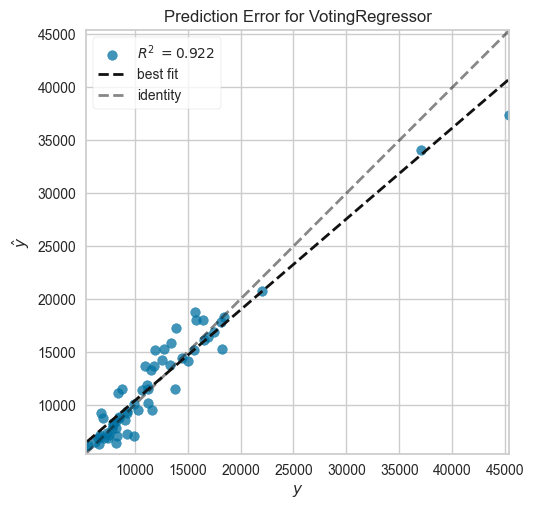

In [66]:
plot_model(blender_exp2, plot='error')

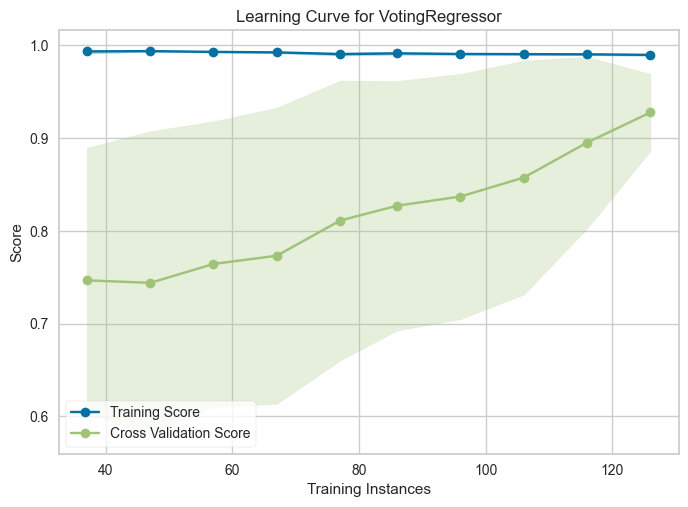

In [67]:
# Валідаційна оцінка швидше прямує вгору до тестової
plot_model(blender_exp2, plot='learning')

Оскільки найкраща модель по метрикам була знайдена в першому експерименті, то цю модель не зберігаємо.

## Висновки

У ході виконання лабораторної роботи було опрацьовано датасет automobile за допомогою бібліотеки PyCaret. Було досягнуто основної мети та набуто навички роботи з PyCaret для вирішення завдань регресії.

Початковий датасет був попереднь оброблений - проблемні значення були перетворені на числовий формат, при цьому некоректні значення замінено на NaN. Далі була здійснена обробка та налаштування безпосередньо через PyCaret, що дозволило підготувати набір для регресії з нормалізацією та імпутацією пропущених значень.

При першому експерименті Random Forest Regressor була визначена початковою кращою моделлю. Далі найкраща модель була отримата за допомогою ансамблю з декількох моделей та показала наступні метрики: MAE = 1429.1530, MSE = 4082971.5892, RMSE = 1912.6124, R² = 0.9342. Такий підхід покращив попередні результати.

При другому експерименті було проведено аналогічне налаштування середовища, але з видаленням ознак з високою кореляцією для зменшення навантаження на модель. Найкраща модель була також отримана за допомогою ансамблю з декількох моделей, але вона показала дещо гірші результати порівняно з першим експериментом. Оскільки зниження продуктивності виявилося незначним, а за рахунок меншого набору ознак було оптимізовано витрати на навчання, найкраща модель згідно експерименту 2 може виявитися більш підходящою для деяких випадків.